<a href="https://colab.research.google.com/github/Lidia173323/Analiza-danych/blob/main/World%20Happiness%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Wczytanie pliku CSV
df = pd.read_csv('world_happiness_report.csv')

# Wyświetlenie pierwszych 5 wierszy
print("--- Pierwsze 5 wierszy danych ---")
print(df.head())

--- Pierwsze 5 wierszy danych ---
   Unnamed: 0      Country          Region  Happiness Rank  Happiness Score  \
0           0  Switzerland  Western Europe             1.0            7.587   
1           1      Iceland  Western Europe             2.0            7.561   
2           2      Denmark  Western Europe             3.0            7.527   
3           3       Norway  Western Europe             4.0            7.522   
4           4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1           

In [ ]:
# Wyświetlenie informacji o kolumnach i typach danych
print("\n--- Informacje o danych (typach i brakujących wartościach) ---")
print(df.info())


--- Informacje o danych (typach i brakujących wartościach) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null

In [ ]:
# Obliczenie procentu brakujących wartości
missimg_data = missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("\n--- Brakujące Wartości w Danych ---")
print(missing_df)


--- Brakujące Wartości w Danych ---
                               Missing Count  Missing Percentage
Standard Error                          1073           87.164907
Region                                   916           74.411048
Happiness Rank                           916           74.411048
Happiness Score                          916           74.411048
Health (Life Expectancy)                 916           74.411048
Economy (GDP per Capita)                 916           74.411048
Dystopia Residual                        916           74.411048
Trust (Government Corruption)            916           74.411048
Freedom                                  761           61.819659
Family                                   761           61.819659
Country                                  614           49.878148
Generosity                               147           11.941511


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['year'].value_counts()

,count
year,
2015,158
2016,157
2018,156
2019,156
2017,155
2020,153
2021,149
2022,147


In [ ]:
df[df['year'].isin([2015, 2016])].isna().sum()

,0
Unnamed: 0,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,157
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0


In [ ]:
df = df[df['year'].isin([2015, 2016])]

In [ ]:
len(df)

315

In [ ]:
key_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
               'Health (Life Expectancy)', 'Freedom',
               'Trust (Government Corruption)', 'Dystopia Residual']

In [ ]:
print("\n--- Statystyki Opisowe ---")
print(df[key_columns].describe())


--- Statystyki Opisowe ---
       Happiness Score  Economy (GDP per Capita)      Family  \
count       315.000000                315.000000  315.000000   
mean          5.378949                  0.899837    0.892647   
std           1.141531                  0.410780    0.286718   
min           2.839000                  0.000000    0.000000   
25%           4.510000                  0.594900    0.739880   
50%           5.286000                  0.973060    0.937930   
75%           6.269000                  1.229000    1.087360   
max           7.587000                  1.824270    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                315.000000  315.000000                     315.000000   
mean                   0.594054    0.399896                       0.140532   
std                    0.240790    0.150684                       0.115490   
min                    0.000000    0.000000                       0.000000   
25%  

<Axes: xlabel='Happiness Score', ylabel='Count'>

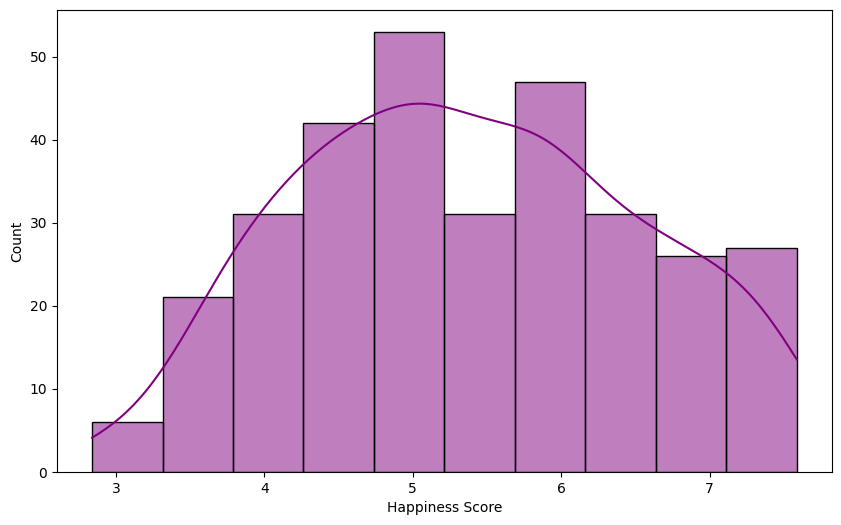

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], kde=True,color='purple')


/tmp/ipython-input-1491801799.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Year')

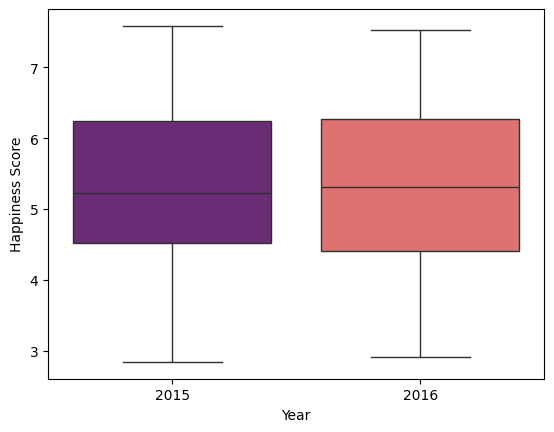

In [ ]:
plt.figsize=(15, 10)
sns.boxplot(data=df, x='year', y='Happiness Score',palette='magma')
plt.xlabel('Year')



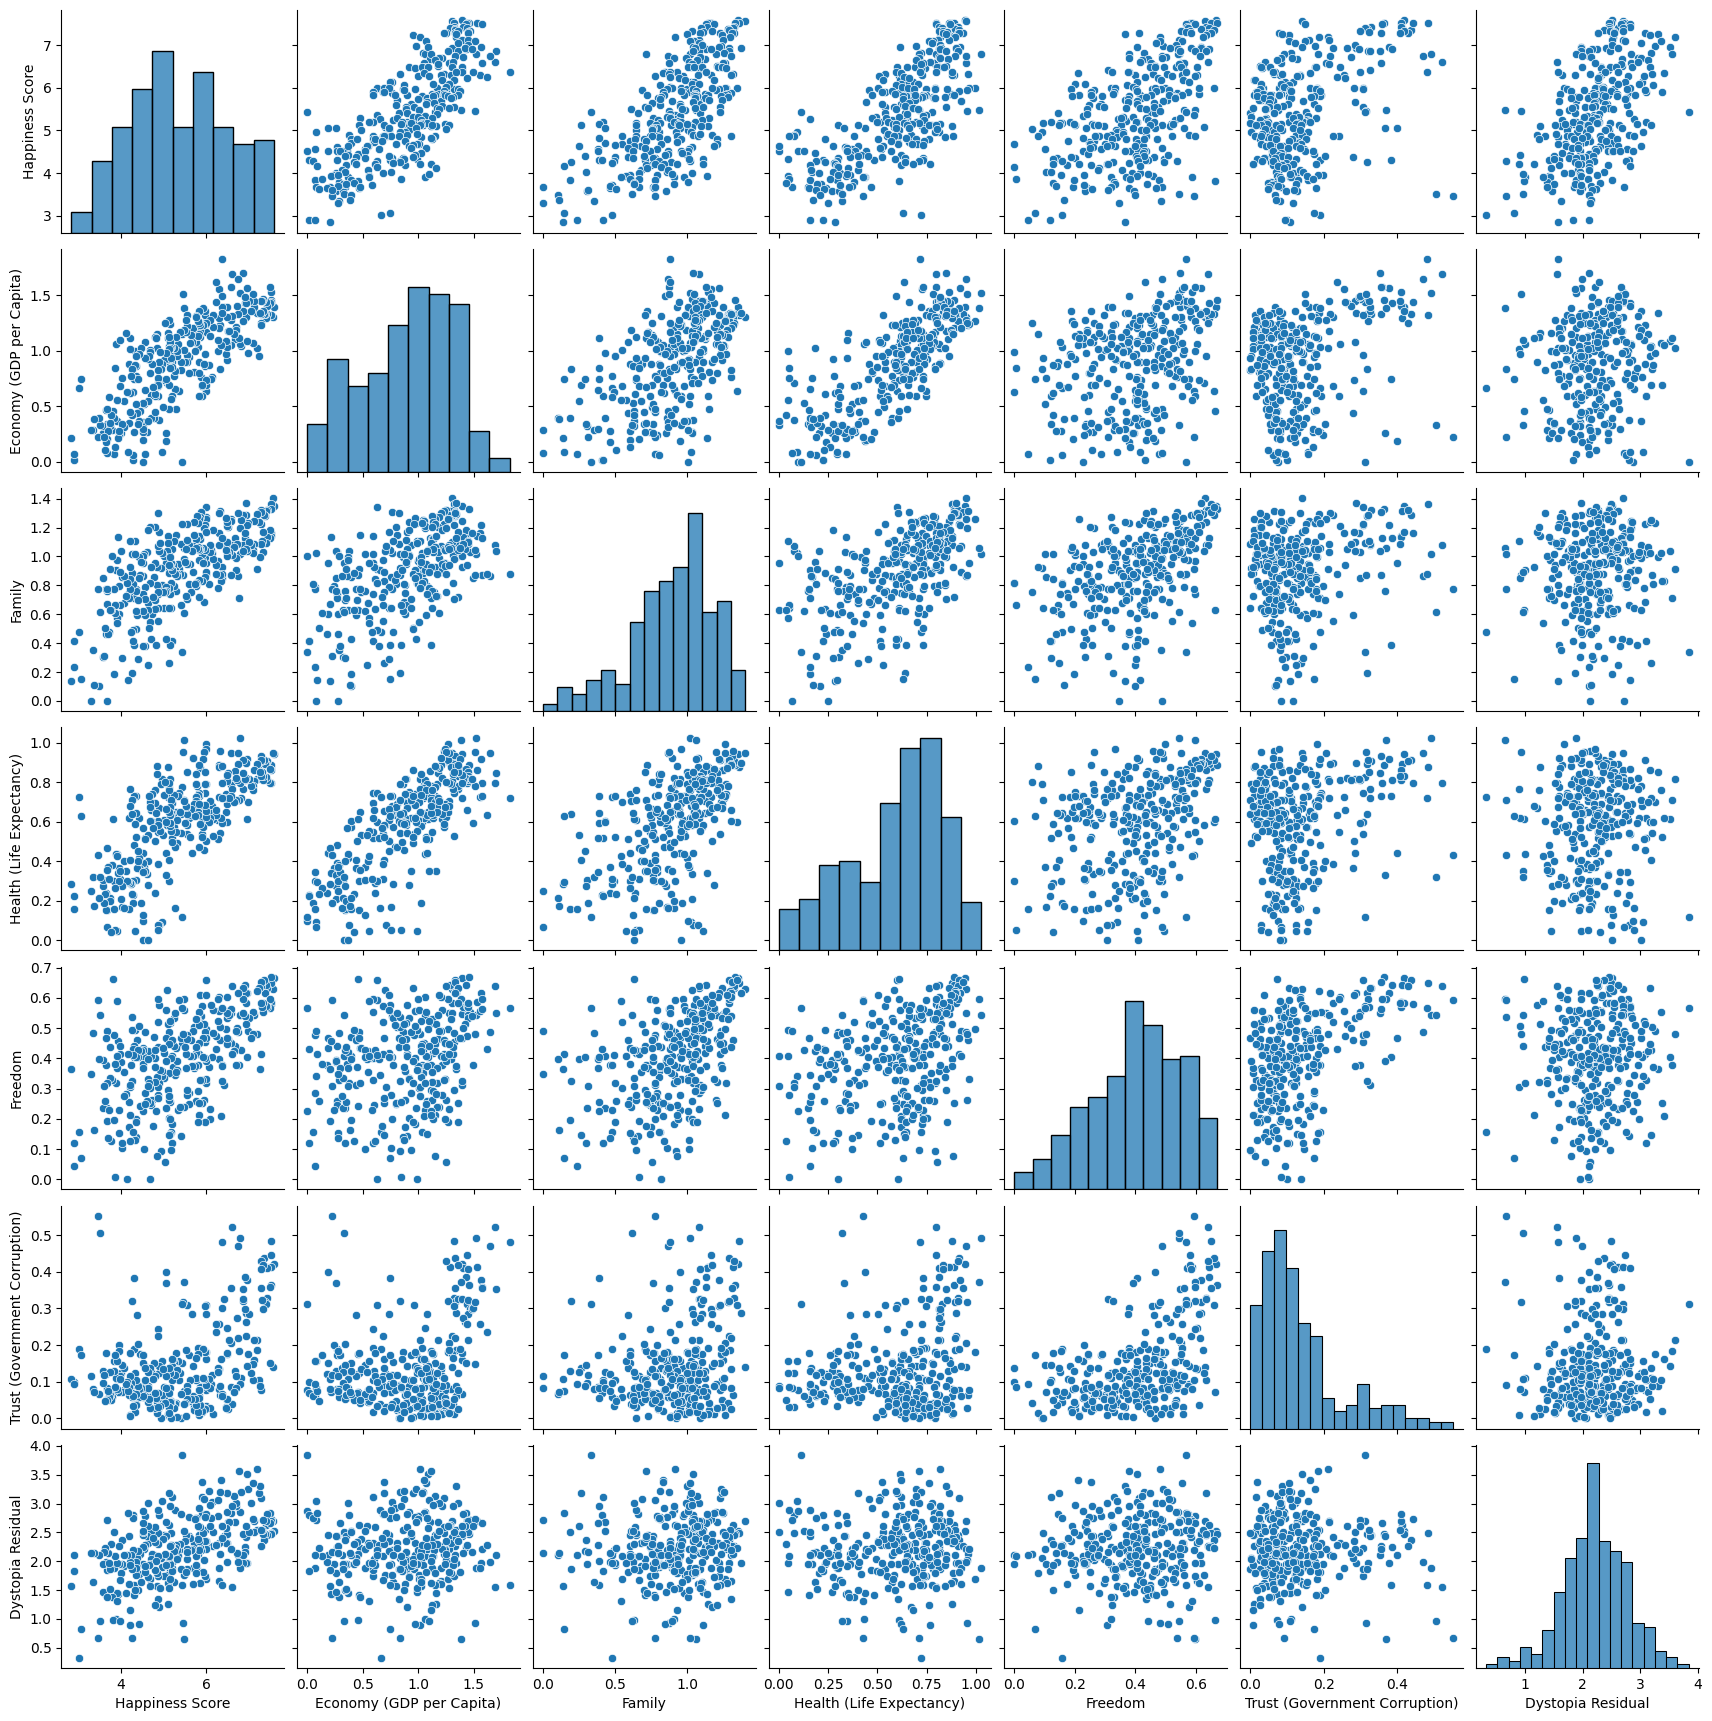

In [ ]:
sns.pairplot(df[key_columns])

<Axes: >

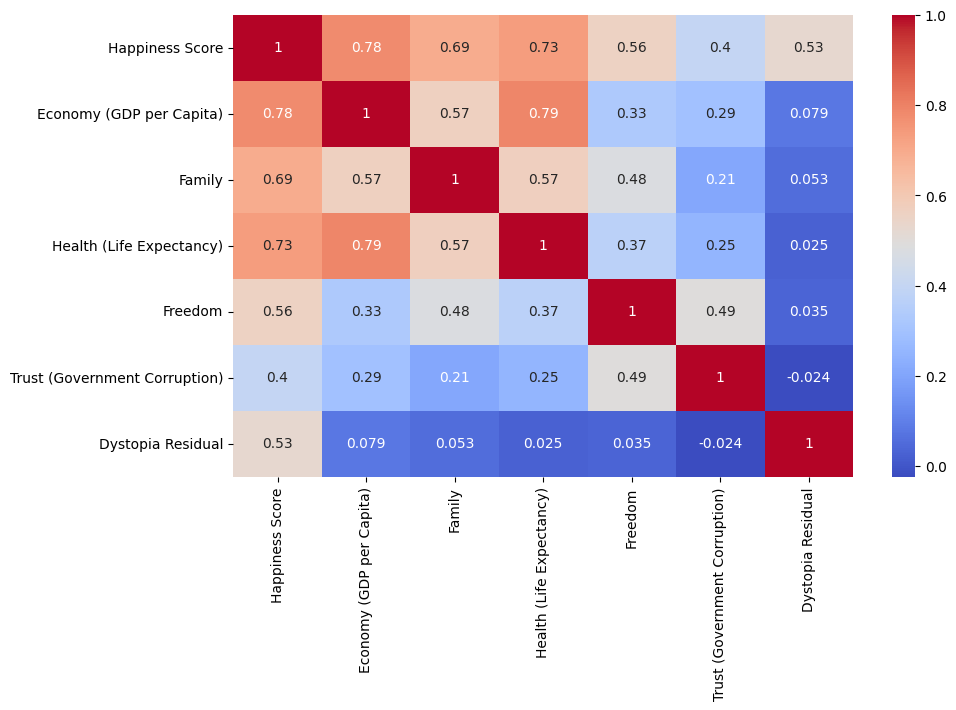

In [ ]:
plt.figure(figsize=(10, 6))
dcorr = df[key_columns].select_dtypes(include='float64').corr()
sns.heatmap(dcorr, annot=True, cmap='coolwarm')

In [ ]:
correlation_matrix = df[key_columns].corr()

# Wyświetlenie korelacji z Happiness Score
print("--- Korelacja Czynników z Happiness Score ---")
print(correlation_matrix['Happiness Score'].sort_values(ascending=False))

--- Korelacja Czynników z Happiness Score ---
Happiness Score                  1.000000
Economy (GDP per Capita)         0.779171
Health (Life Expectancy)         0.734491
Family                           0.693547
Freedom                          0.556414
Dystopia Residual                0.526343
Trust (Government Corruption)    0.397989
Name: Happiness Score, dtype: float64


<Axes: >

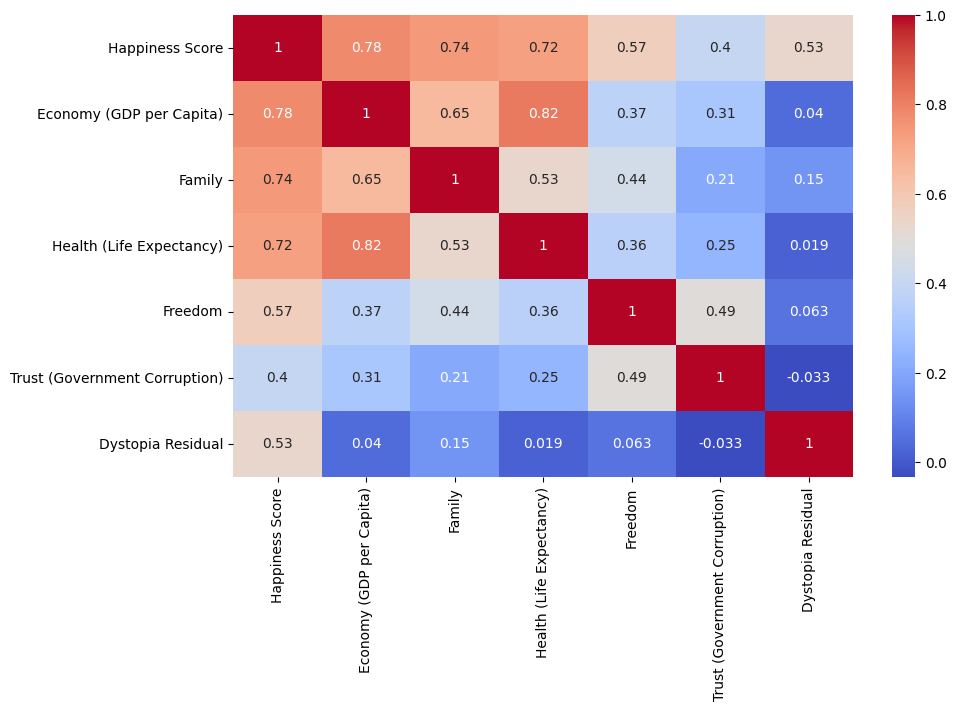

In [ ]:
plt.figure(figsize=(10, 6))
dcorr = df[df['year'] == 2015][key_columns].select_dtypes(include='float64').corr()
sns.heatmap(dcorr, annot=True, cmap='coolwarm')

<Axes: >

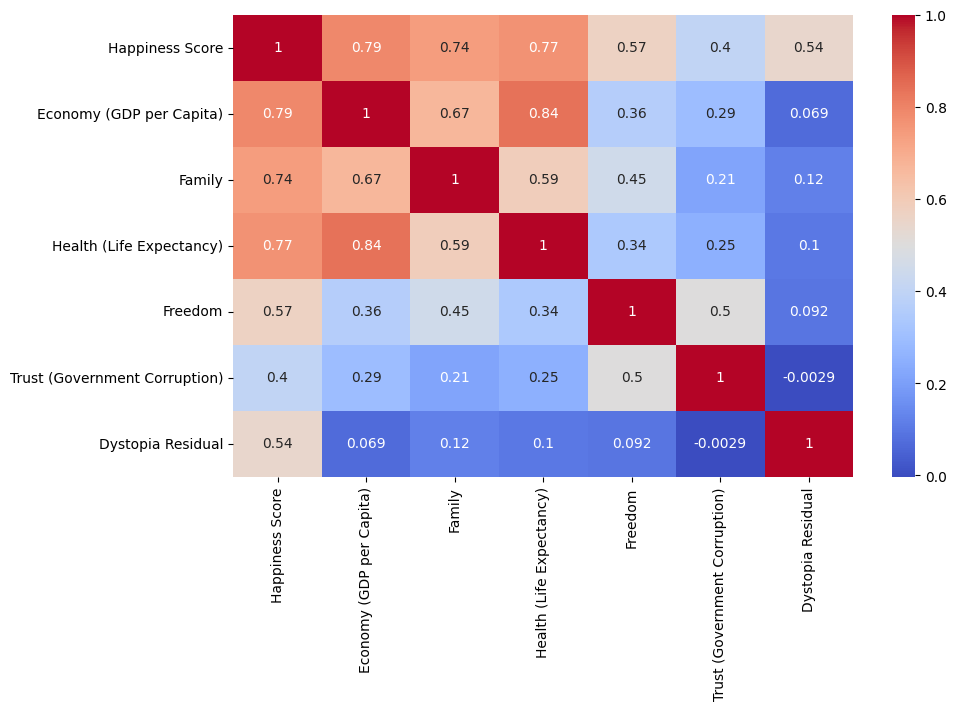

In [ ]:
plt.figure(figsize=(10, 6))
dcorr = df[df['year'] == 2016][key_columns].select_dtypes(include='float64').corr()
sns.heatmap(dcorr, annot=True, cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wybór cech (X) i zmiennej docelowej (Y)
X_nor = df[key_columns].drop('Happiness Score', axis=1)
y = df['Happiness Score']

# Standardyzacja danych
scaler = StandardScaler()
X = scaler.fit_transform(X_nor)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Rozmiar zbioru treningowego (X_train): {X_train.shape}")
print(f"Rozmiar zbioru testowego (X_test): {X_test.shape}")

Rozmiar zbioru treningowego (X_train): (252, 6)
Rozmiar zbioru testowego (X_test): (63, 6)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Poprawiony import

# Inicjalizacja i trening modelu
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
lr_pred = lr_model.predict(X_test)

# Ocena modelu
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("--- Wyniki Regresji Liniowej ---")
print(f"R^2 (Współczynnik Determinacji): {lr_r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {lr_rmse:.4f}")
# Walidacja krzyżowa (cv=5)
lr_cv = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print("Cross-val R²:", lr_cv.mean().round(4))

--- Wyniki Regresji Liniowej ---
R^2 (Współczynnik Determinacji): 0.9908
RMSE (Root Mean Squared Error): 0.1168
Cross-val R²: 0.9458


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inicjalizacja i trening modelu
# Używamy prostych domyślnych hiperparametrów
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
rf_pred = rf_model.predict(X_test)

# Ocena modelu
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\n--- Wyniki Random Forest Regressor ---")
print(f"R^2 (Współczynnik Determinacji): {rf_r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rf_rmse:.4f}")
rf_cv = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-val R²:", rf_cv.mean().round(4))


--- Wyniki Random Forest Regressor ---
R^2 (Współczynnik Determinacji): 0.9605
RMSE (Root Mean Squared Error): 0.2416
Cross-val R²: 0.4749



--- Ważność Cech w Modelu Random Forest ---
Economy (GDP per Capita)         0.388484
Health (Life Expectancy)         0.233809
Dystopia Residual                0.208420
Family                           0.080433
Freedom                          0.065315
Trust (Government Corruption)    0.023540
dtype: float64


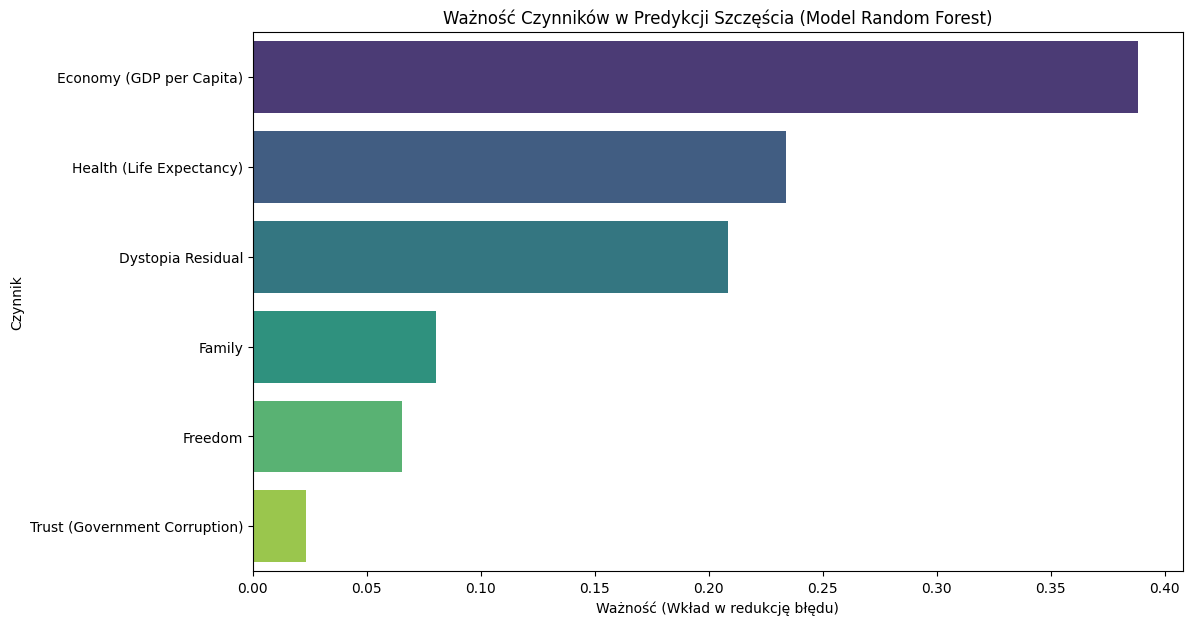

In [ ]:
# Ważność cech z modelu Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_nor.columns)

# Sortowanie i wizualizacja
feature_importances = feature_importances.sort_values(ascending=False)

print("\n--- Ważność Cech w Modelu Random Forest ---")
print(feature_importances)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis", hue=feature_importances.index, legend=False)
plt.title('Ważność Czynników w Predykcji Szczęścia (Model Random Forest)')
plt.xlabel('Ważność (Wkład w redukcję błędu)')
plt.ylabel('Czynnik')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Inicjalizacja i trening modelu XGBoost
# Użyjemy domyślnych parametrów, aby porównanie było uczciwe
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Cel: regresja z błędem kwadratowym
    n_estimators=300,             # Liczba drzew
    learning_rate=0.07,            # Szybkość uczenia
    random_state=42
)

# Trening na zbiorze treningowym
xgb_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
xgb_pred = xgb_model.predict(X_test)

# Ocena modelu
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("--- Wyniki XGBoost Regressor ---")
print(f"R^2 (Współczynnik Determinacji): {xgb_r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {xgb_rmse:.4f}")
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Cross-val R²:", xgb_cv.mean().round(4))

--- Wyniki XGBoost Regressor ---
R^2 (Współczynnik Determinacji): 0.9452
RMSE (Root Mean Squared Error): 0.2845
Cross-val R²: 0.4627



--- Ważność Cech w Modelu XGBoost ---
Economy (GDP per Capita)         0.450873
Dystopia Residual                0.276203
Health (Life Expectancy)         0.139436
Family                           0.059024
Freedom                          0.058813
Trust (Government Corruption)    0.015650
dtype: float32


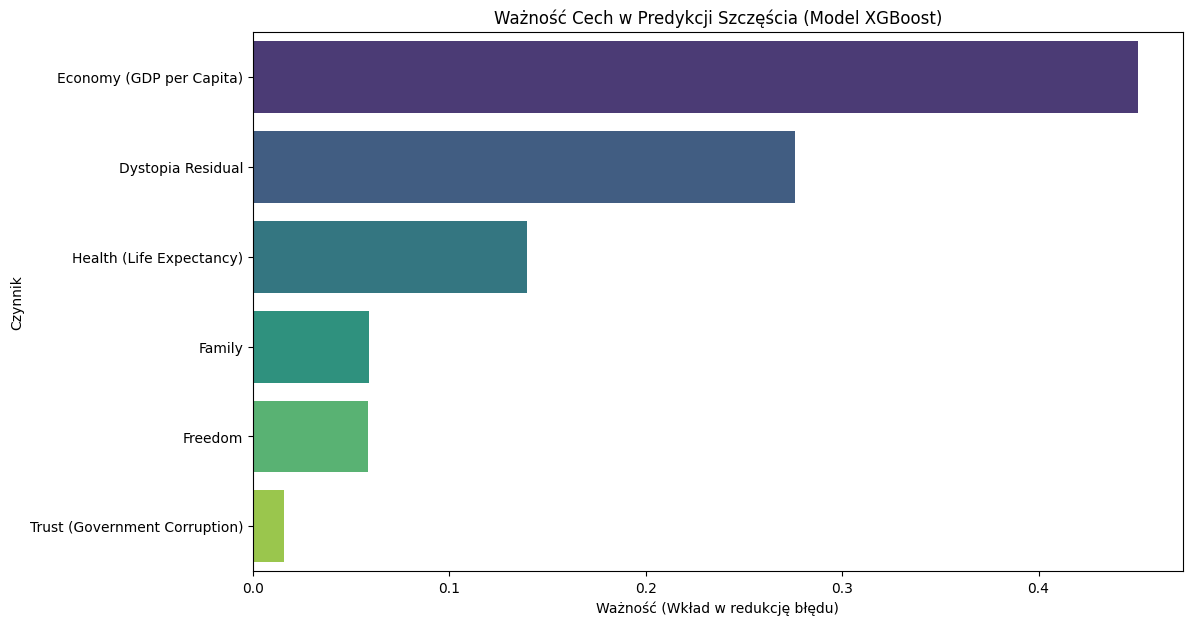

In [ ]:
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X_nor.columns)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False)

print("\n--- Ważność Cech w Modelu XGBoost ---")
print(xgb_feature_importances)
plt.figure(figsize=(12, 7))
sns.barplot(x=xgb_feature_importances.values, y=xgb_feature_importances.index, palette="viridis", hue=xgb_feature_importances.index, legend=False)
plt.title('Ważność Cech w Predykcji Szczęścia (Model XGBoost)')
plt.xlabel('Ważność (Wkład w redukcję błędu)')
plt.ylabel('Czynnik')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

gbr_r2 = r2_score(y_test, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))

print("\n--- Gradient Boosting Regressor ---")
print("R²:", round(gbr_r2, 4))
print("RMSE:", round(gbr_rmse, 4))

# Walidacja krzyżowa
gbr_cv = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')
print("Cross-val R²:", gbr_cv.mean().round(4))


--- Gradient Boosting Regressor ---
R²: 0.963
RMSE: 0.2338
Cross-val R²: 0.661



--- Ważność Cech w Modelu XGBoost ---
Economy (GDP per Capita)         0.382664
Dystopia Residual                0.242411
Health (Life Expectancy)         0.154488
Family                           0.127774
Freedom                          0.068909
Trust (Government Corruption)    0.023755
dtype: float64


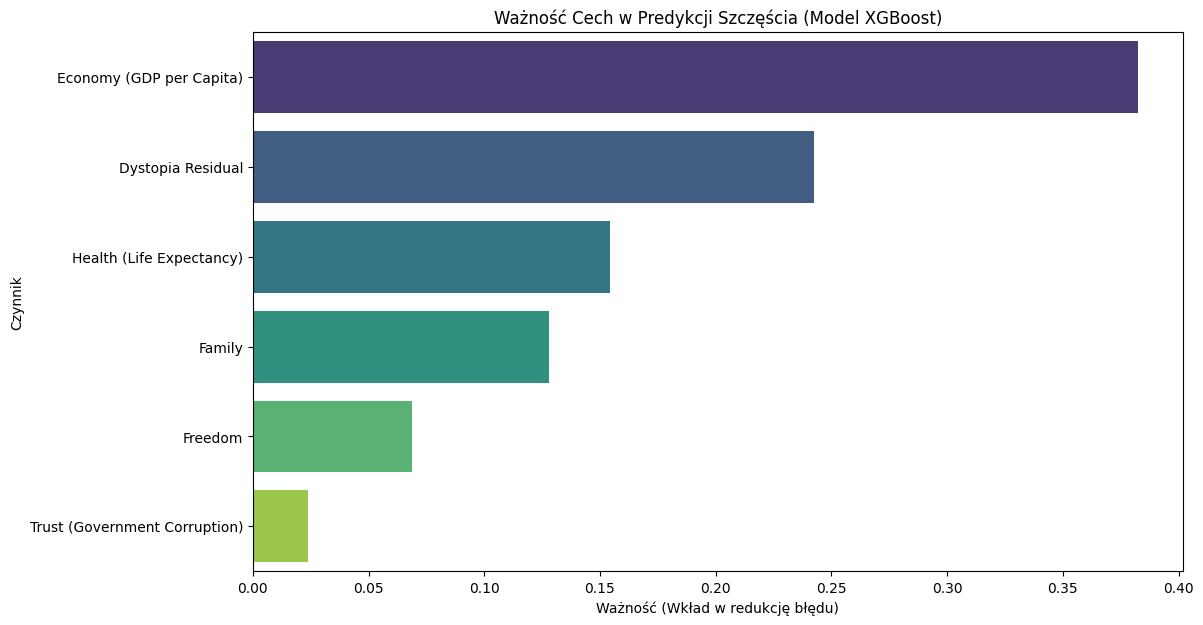

In [ ]:
gbr_feature_importances = pd.Series(gbr_model.feature_importances_, index=X_nor.columns)
gbr_feature_importances = gbr_feature_importances.sort_values(ascending=False)

print("\n--- Ważność Cech w Modelu XGBoost ---")
print(gbr_feature_importances)
plt.figure(figsize=(12, 7))
sns.barplot(x=gbr_feature_importances.values, y=gbr_feature_importances.index, palette="viridis", hue=gbr_feature_importances.index, legend=False)
plt.title('Ważność Cech w Predykcji Szczęścia (Model XGBoost)')
plt.xlabel('Ważność (Wkład w redukcję błędu)')
plt.ylabel('Czynnik')
plt.show()

                                 R2      RMSE
Linear Regression          0.990767  0.116777
Random Forest              0.960488  0.241570
XGBoost                    0.945206  0.284476
GradientBoostingRegressor  0.945206  0.284476


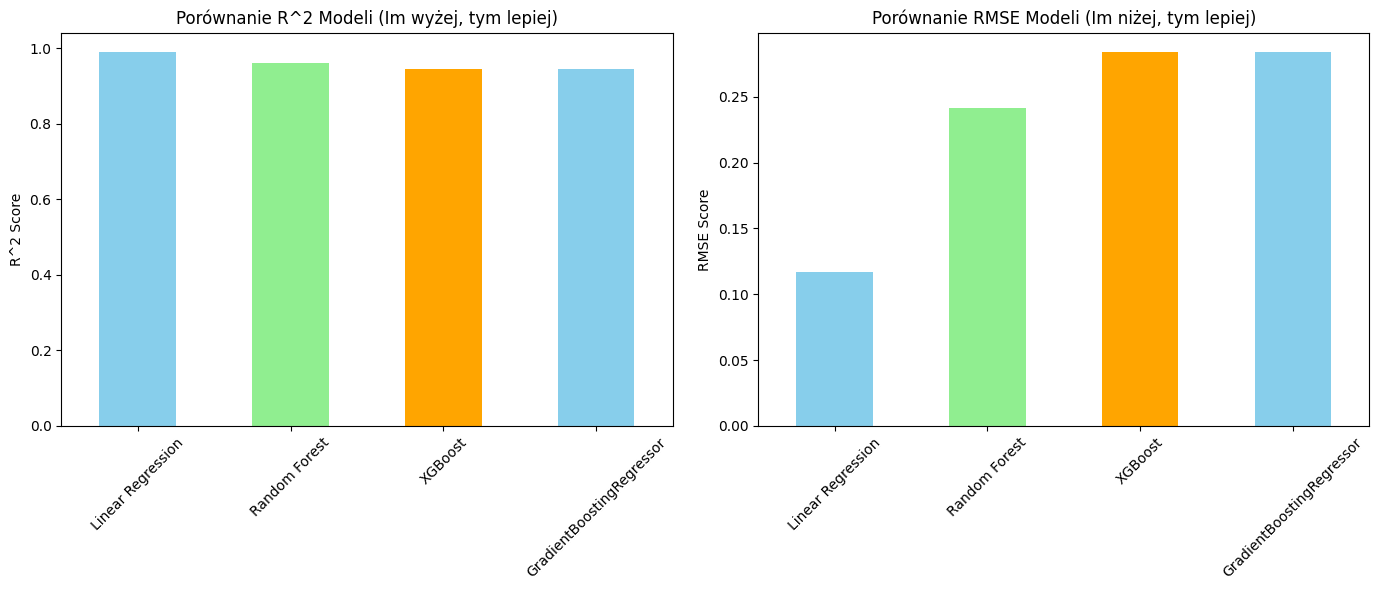

In [ ]:
results = {
    'Linear Regression': {'R2': lr_r2, 'RMSE': lr_rmse},
    'Random Forest': {'R2': rf_r2, 'RMSE': rf_rmse},
    'XGBoost': {'R2': xgb_r2, 'RMSE': xgb_rmse},
    'GradientBoostingRegressor': {'R2': xgb_r2, 'RMSE': xgb_rmse}
}

results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)

# Wizualizacja porównania R^2 i RMSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

results_df['R2'].plot(kind='bar', ax=ax[0], title='Porównanie R^2 Modeli (Im wyżej, tym lepiej)', color=['skyblue', 'lightgreen', 'orange'])
ax[0].set_ylabel('R^2 Score')
ax[0].tick_params(axis='x', rotation=45)

results_df['RMSE'].plot(kind='bar', ax=ax[1], title='Porównanie RMSE Modeli (Im niżej, tym lepiej)', color=['skyblue', 'lightgreen', 'orange'])
ax[1].set_ylabel('RMSE Score')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df['Country'].isna().sum()
df.dropna(subset=['Country'], inplace=True)

In [ ]:
happiness_by_country = df.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False)

In [ ]:
print("\n--- Top 5 Krajów z Największym Poziomem Szczęścia ---")
print(happiness_by_country.head(5))


--- Top 5 Krajów z Największym Poziomem Szczęścia ---
Country
Switzerland    7.5480
Iceland        7.5310
Denmark        7.5265
Norway         7.5100
Canada         7.4155
Name: Happiness Score, dtype: float64


/tmp/ipython-input-2649128520.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




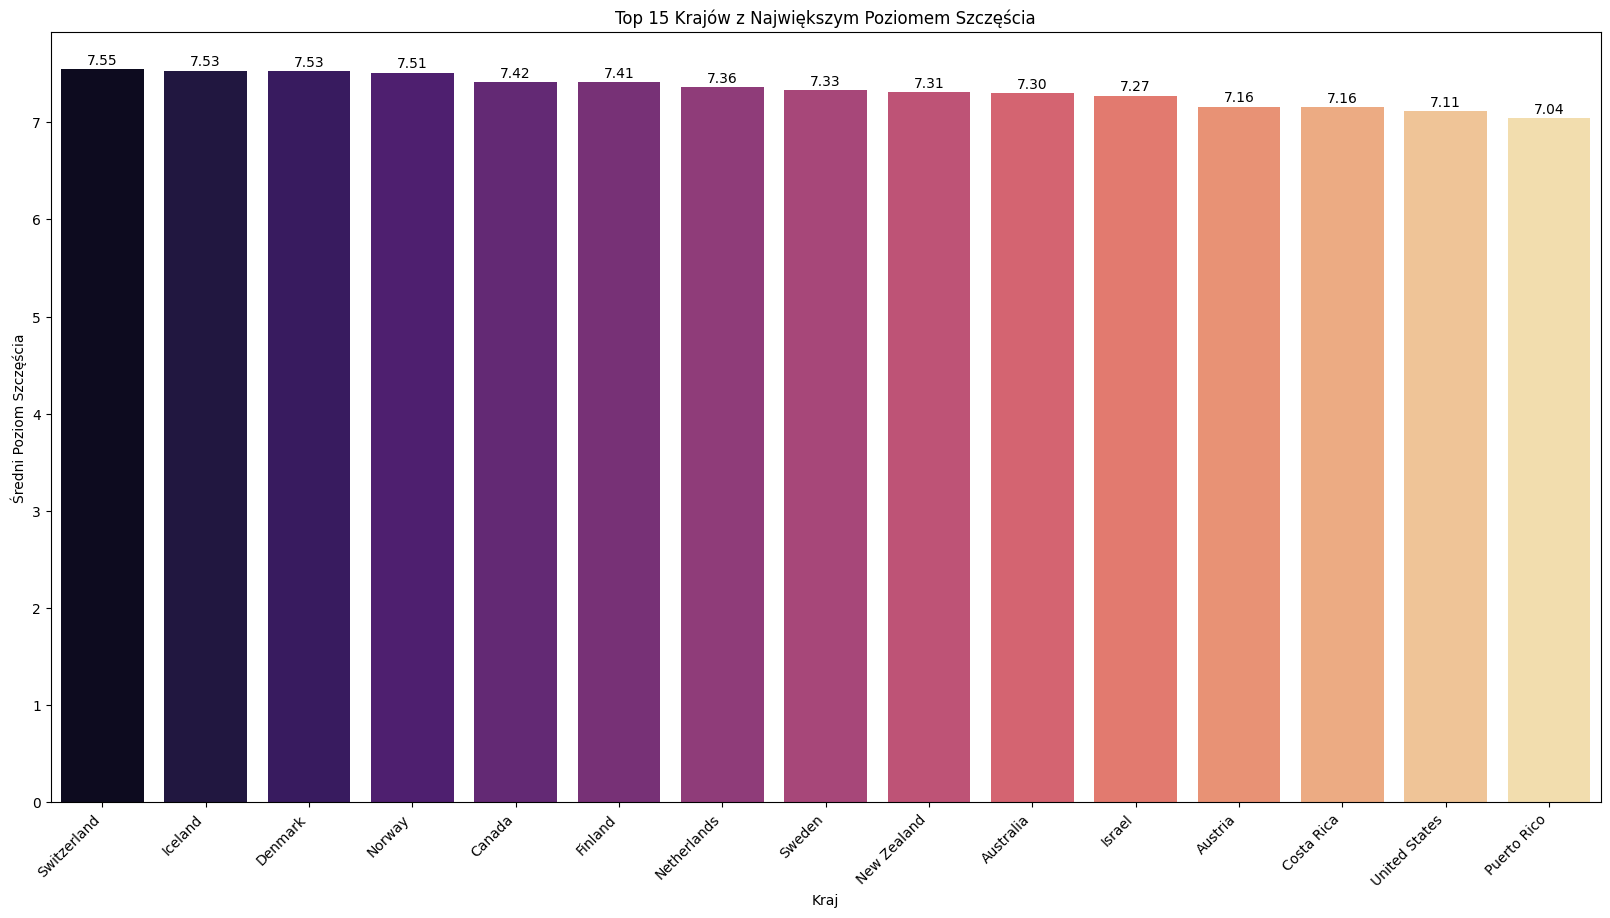

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=happiness_by_country.head(15).index, y=happiness_by_country.head(15).values, palette='magma')
plt.title('Top 15 Krajów z Największym Poziomem Szczęścia')
plt.xlabel('Kraj')
plt.ylabel('Średni Poziom Szczęścia')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(happiness_by_country.head(15).values):
    plt.text(index, value + 0.05, f'{value:.2f}', color='black', ha='center')
plt.show()

In [ ]:
print("\n--- Top 5 Krajów z Najniższym Poziomem Szczęścia ---")
print(happiness_by_country.tail(5))


--- Top 5 Krajów z Najniższym Poziomem Szczęścia ---
Country
Afghanistan    3.4675
Benin          3.4120
Togo           3.0710
Syria          3.0375
Burundi        2.9050
Name: Happiness Score, dtype: float64


/tmp/ipython-input-486791017.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




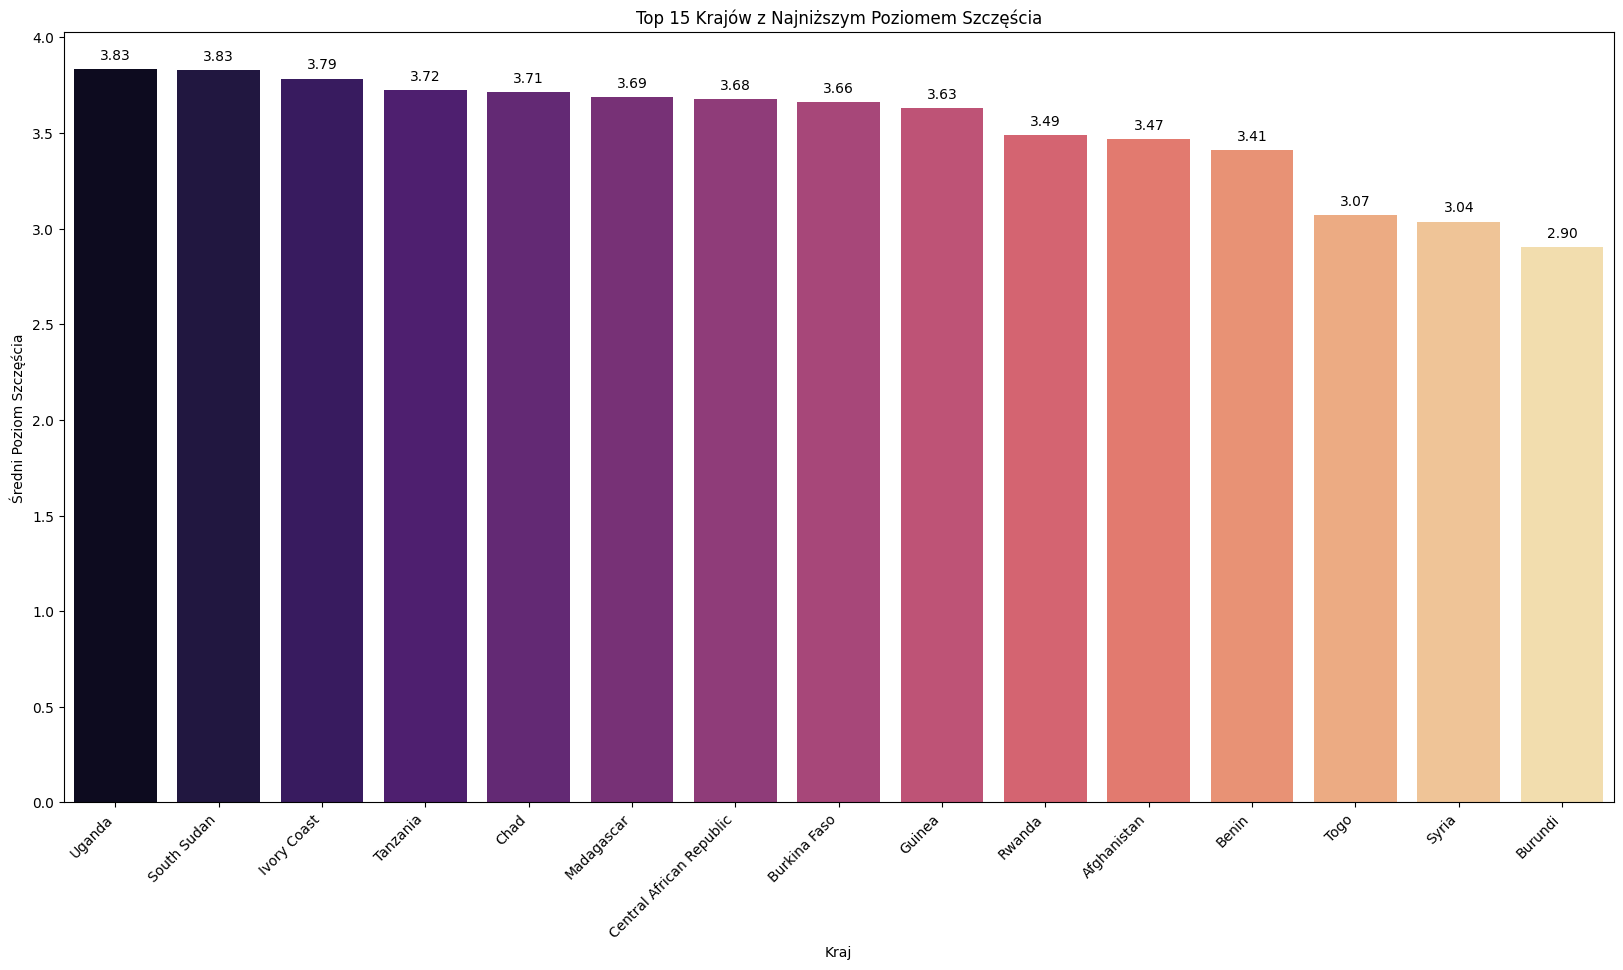

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=happiness_by_country.tail(15).index, y=happiness_by_country.tail(15).values, palette='magma')
plt.title('Top 15 Krajów z Najniższym Poziomem Szczęścia')
plt.xlabel('Kraj')
plt.ylabel('Średni Poziom Szczęścia')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(happiness_by_country.tail(15).values):
    plt.text(index, value + 0.05, f'{value:.2f}', color='black', ha='center')
plt.show()

In [ ]:
import plotly.express as px
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='Happiness Score')
fig.show()